In [0]:
# Import keras, tensorflow and some helpers
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

#A simple convnet on the MNIST dataset

There are 70,000 images in MNIST dataset which are numbers from 0-9 having size 28 X 28 each.
Our gole is to create a Convolution Neural Network which can classify these images into one of these 10 classes CORRECTLY!

We will build it 7 EASY steps so, let's get started!!

![alt text](https://www.researchgate.net/profile/Pew-Thian_Yap/publication/224466484/figure/fig7/AS:302648906534920@1449168530938/Sample-images-from-the-MNIST-handwritten-digits-database.png)



This is how Machine will read number 8

![alt text](https://cdn-images-1.medium.com/max/800/1*zY1qFB9aFfZz66YxxoI2aw.gif)



# STEP 1: Load image data from MNIST

In [0]:
# YOUR CODE HERE

## Solution

In [0]:
# define parameters for NN
img_rows, img_cols = 28, 28
batch_size = 128
num_classes = 10
epochs = 12

# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Plot images and labels

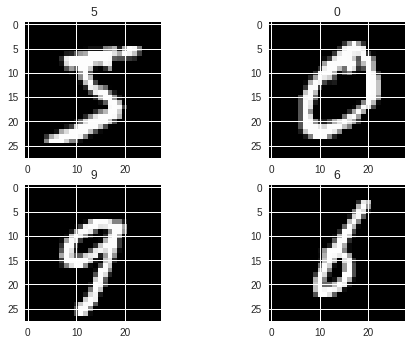

In [17]:
# let's plot 4 images and their labels
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.title(y_train[0])
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.title(y_train[1])


# YOUR CODE HERE
# Plot 45th and 256th image from dataset with label
plt.subplot(223)
plt.imshow(x_train[45], cmap=plt.get_cmap('gray'))
plt.title(y_train[45])

plt.subplot(224)
plt.imshow(x_train[256], cmap=plt.get_cmap('gray'))
plt.title(y_train[256])

plt.show()

# STEP 2: Preprocess input data for Keras

1. Reshape
2. Convert our data type to float32 
3. Normalize our data values to the range [0, 1]


## Not so cool stuff here 😪

In [0]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255   

 # STEP 3: Preprocess class labels for Keras

One hot encoding

In [0]:
# YOUR CODE HERE

## Solution


In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# STEP 4: Define model architecture




In [0]:
# YOUR CODE HERE

## Solution

In [22]:
# Keras automatically handles the connections between layers.
model = Sequential()

# number of kernel: 32 | Size: 3 X 3 | Activation function: Relu
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

# add more layers
model.add(Conv2D(64, (3, 3), activation='relu'))      
model.add(MaxPooling2D(pool_size=(2, 2)))

# regularizing our model in order to prevent overfitting
model.add(Dropout(0.25))

# fully connected layer (1-D)
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# the final layer has an output size of 10, corresponding to the 10 classes of digits
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

# STEP 5:  Compile model


In [0]:
# YOUR CODE HERE

## Solution

# ![alt text](https://cdn-images-1.medium.com/max/800/1*bGBijVuJnTRj8025et0mcQ.gif)

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# STEP 6: Fit model on 60k training and Validate it on 10k images


In [0]:
# YOUR CODE HERE

## Solution

In [26]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 167s 3ms/step - loss: 0.2822 - acc: 0.9131 - val_loss: 0.0576 - val_acc: 0.9807
Epoch 2/12
60000/60000 [==============================] - 165s 3ms/step - loss: 0.0935 - acc: 0.9722 - val_loss: 0.0448 - val_acc: 0.9843
Epoch 3/12
60000/60000 [==============================] - 165s 3ms/step - loss: 0.0680 - acc: 0.9796 - val_loss: 0.0334 - val_acc: 0.9889
Epoch 4/12
60000/60000 [==============================] - 164s 3ms/step - loss: 0.0549 - acc: 0.9839 - val_loss: 0.0300 - val_acc: 0.9903
Epoch 5/12
60000/60000 [==============================] - 166s 3ms/step - loss: 0.0476 - acc: 0.9849 - val_loss: 0.0280 - val_acc: 0.9910
Epoch 6/12
60000/60000 [==============================] - 167s 3ms/step - loss: 0.0421 - acc: 0.9872 - val_loss: 0.0281 - val_acc: 0.9906
Epoch 7/12
60000/60000 [==============================] - 168s 3ms/step - loss: 0.0379 - acc: 0.9888 - val_loss: 0.0286 - 

# STEP: 7 Evaluate model on test data


In [0]:
# YOUR CODE HERE

## Solution

In [28]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.027182015424094062
Test accuracy: 0.9924


# Test it on own image!!

1. Create an image in paint
2. Upload it here
3. Pre-process it
4. Evaluate on our model

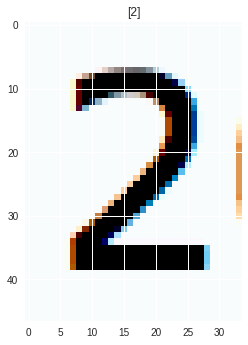

In [34]:
# https://raw.githubusercontent.com/9crk/caffe-mnist-test/master/3.jpg
# https://raw.githubusercontent.com/9crk/caffe-mnist-test/master/4.png

import cv2

img = mpimg.imread('https://raw.githubusercontent.com/9crk/caffe-mnist-test/master/2.png')     # read image
label = np.array([2])    # assign corect label to it

# plot input image and label
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.title(label)

# pre-process
img = cv2.resize(img,(28,28))
img = img[:,:,0]
img = img.reshape(1, 28, 28,1)

label = keras.utils.to_categorical(label, num_classes)

In [0]:
# YOUR CODE HERE

## Solution

In [31]:
# evalute on our model
score = model.evaluate(img, label, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred = model.predict(img)
predicted = np.argmax(pred, axis=1)
print("Predicted Output: ", predicted)

Test loss: 0.00015176493616309017
Test accuracy: 1.0
Predicted Output:  [2]


# Visualization of Model Accuracy and Loss

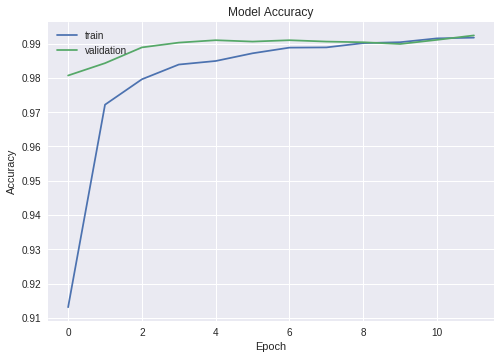

In [32]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

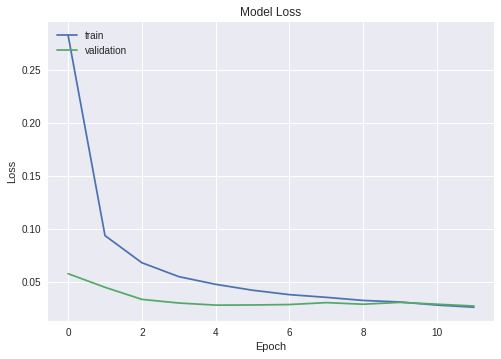

In [33]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "validation"], loc="upper left")
plt.show()